In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
df = pd.read_csv("Algerian_forest_fires.csv")
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [129]:
df.iloc[:, 0:3].columns

Index(['day', 'month', 'year'], dtype='object')

In [130]:
df.drop(df.iloc[:, 0:3].columns, axis=1, inplace = True)

In [131]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [132]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [133]:
df['Classes'] = np.where(df['Classes'].str.contains("not fire"), 0,1)

In [134]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [135]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [136]:
x = df.drop('FWI', axis=1)

In [137]:
x.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'Classes', 'Region'],
      dtype='object')

In [138]:
y = df['FWI']

In [139]:
from sklearn.model_selection import train_test_split

In [140]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42)

In [141]:
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

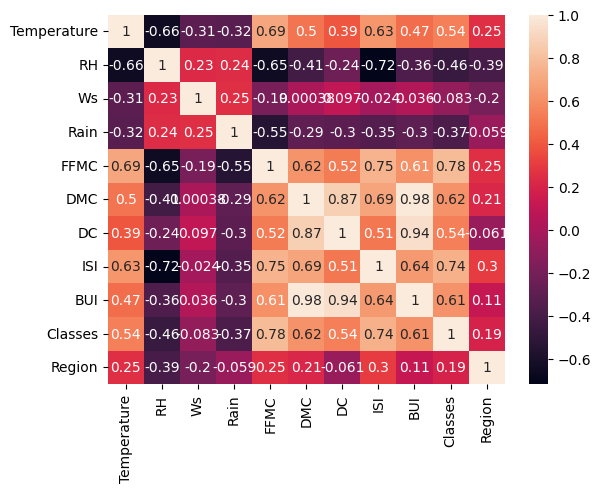

In [142]:
sns.heatmap(x_train.corr(), annot=True)

In [143]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [144]:
def vif_filter(df, threshold=10.0):
    df_const = add_constant(df)
    vif = pd.Series(
        [variance_inflation_factor(df_const.values, i) for i in range(df_const.shape[1])],
        index=df_const.columns
    )
    return vif[vif > threshold].drop("const", errors="ignore").index.tolist()


In [145]:
print("Features with high Multicollinearity: ", vif_filter(x_train, threshold=10.0))

Features with high Multicollinearity:  ['DMC', 'DC', 'BUI']


In [146]:
x_train.drop(vif_filter(x_train, 10), axis=1, inplace = True)
x_test.drop(vif_filter(x_test, 10), axis=1, inplace = True)

In [147]:
x_train.head()

,Temperature,RH,Ws,Rain,FFMC,ISI,Classes,Region
97,29,74,19,0.1,75.8,2.1,0,0
141,31,72,14,0.2,60.2,0.8,0,1
192,40,31,15,0.0,94.2,16.6,1,1
68,32,60,18,0.3,77.1,2.2,0,0
119,32,47,14,0.7,77.5,1.8,0,0


In [148]:
x_test.head()

,Temperature,RH,Ws,Rain,FFMC,ISI,Classes,Region
24,31,64,15,0.0,86.7,5.7,1,0
6,33,54,13,0.0,88.2,6.4,1,0
152,28,58,18,2.2,63.7,1.2,0,1
232,34,58,13,0.2,79.5,2.1,0,1
238,30,65,14,0.0,85.4,4.5,1,1


In [149]:
from sklearn.preprocessing import StandardScaler

In [150]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

<Axes: >

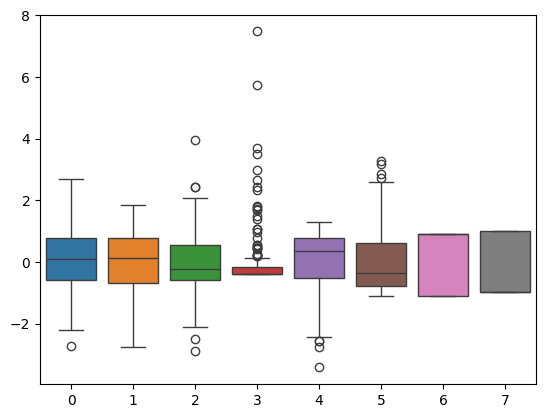

In [151]:
sns.boxplot(data = x_train)

In [152]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [153]:
reg = LinearRegression()
reg.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [154]:
y_pred = reg.predict(x_test)

Mean absolute error 1.6603583040730434
R2 Score 0.8619378295406555


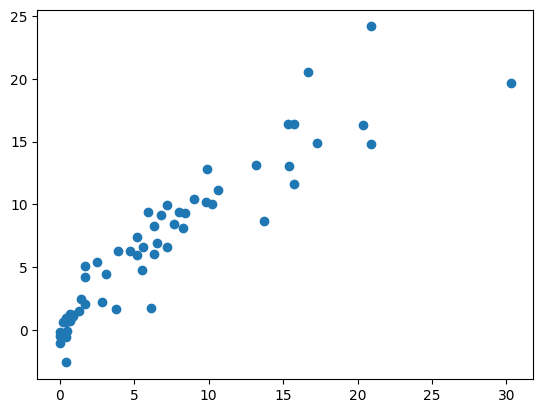

In [155]:
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

In [156]:
from sklearn.linear_model import Lasso

In [157]:
lasso = Lasso()

In [158]:
lasso.fit(x_train, y_train)

,alpha,1.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [159]:
y_pred_lasso = lasso.predict(x_test)

Mean absolute error 1.8118111432818886
R2 Score 0.8347656882567904


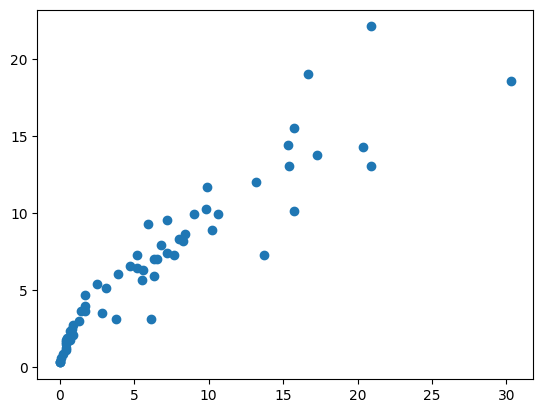

In [160]:
mae=mean_absolute_error(y_test,y_pred_lasso)
score=r2_score(y_test,y_pred_lasso)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred_lasso)

In [161]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(x_train, y_train)

,eps,0.001
,n_alphas,'deprecated'
,alphas,'warn'
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,copy_X,True
,cv,5
,verbose,False
,n_jobs,None


In [162]:
y_pred_lassocv = lassocv.predict(x_test)

Mean absolute error 1.654289466021366
R2 Score 0.8620590474571694


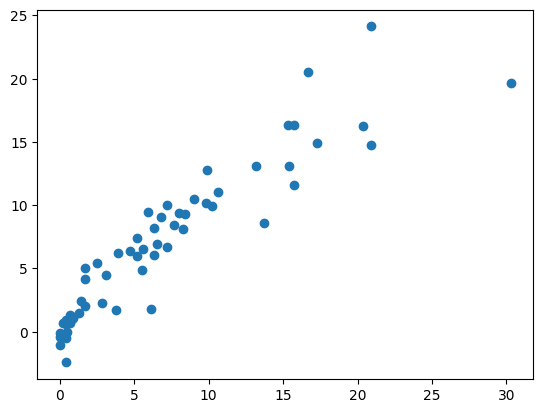

In [163]:
plt.scatter(y_test,y_pred_lassocv)
mae=mean_absolute_error(y_test,y_pred_lassocv)
score=r2_score(y_test,y_pred_lassocv)
print("Mean absolute error", mae)
print("R2 Score", score)

In [164]:
print(lassocv.alpha_)

0.012334981670011578


In [165]:
from sklearn.linear_model import Ridge

Mean absolute error 1.6703957655223396
R2 Score 0.8605765496094766


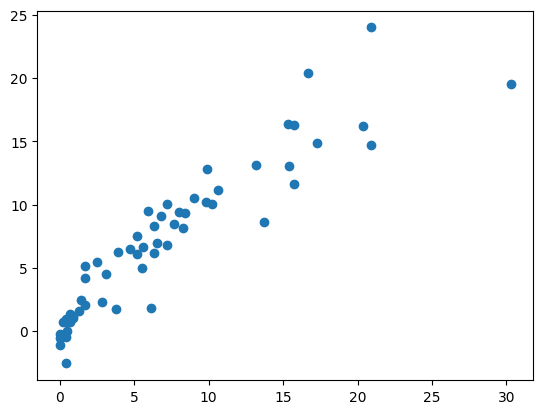

In [166]:
ridge = Ridge()
ridge.fit(x_train, y_train)
y_pred_ridge = ridge.predict(x_test)
mae=mean_absolute_error(y_test,y_pred_ridge)
score=r2_score(y_test,y_pred_ridge)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred_ridge)

Mean absolute error 1.8323955527237985
R2 Score 0.8445169282059815


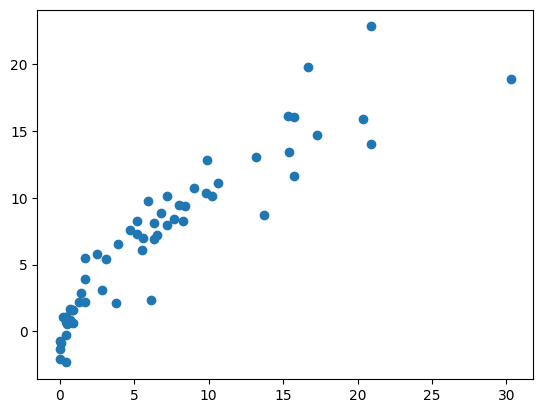

In [167]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(x_train,y_train)
y_pred_ridgecv=ridgecv.predict(x_test)
plt.scatter(y_test,y_pred_ridgecv)
mae=mean_absolute_error(y_test,y_pred_ridgecv)
score=r2_score(y_test,y_pred_ridgecv)
print("Mean absolute error", mae)
print("R2 Score", score)


In [168]:
from sklearn.linear_model import ElasticNet

In [169]:
elastic = ElasticNet()

In [170]:
elastic.fit(x_train, y_train)

,alpha,1.0
,l1_ratio,0.5
,fit_intercept,True
,precompute,False
,max_iter,1000
,copy_X,True
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [171]:
y_pred_elastic = elastic.predict(x_test)

Mean absolute error 2.5777020883526904
R2 Score 0.7285625839450534


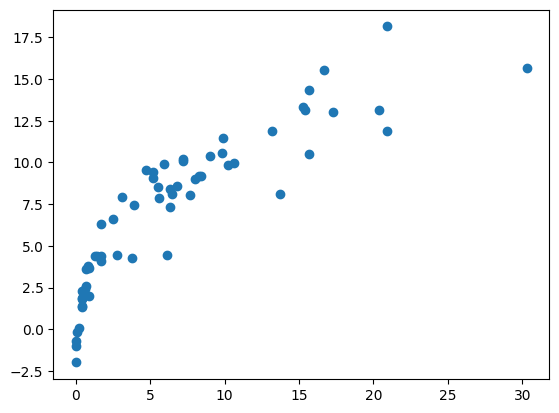

In [172]:
mae=mean_absolute_error(y_test,y_pred_elastic)
score=r2_score(y_test,y_pred_elastic)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred_elastic)

In [173]:
from sklearn.linear_model import ElasticNetCV

In [174]:
elastic_cv = ElasticNetCV()

In [175]:
elastic_cv.fit(x_train, y_train)

,l1_ratio,0.5
,eps,0.001
,n_alphas,'deprecated'
,alphas,'warn'
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,cv,None
,copy_X,True
,verbose,0


In [176]:
y_pred_elastic_cv = elastic_cv.predict(x_test)

Mean absolute error 1.6950255400424803
R2 Score 0.8562256446928836


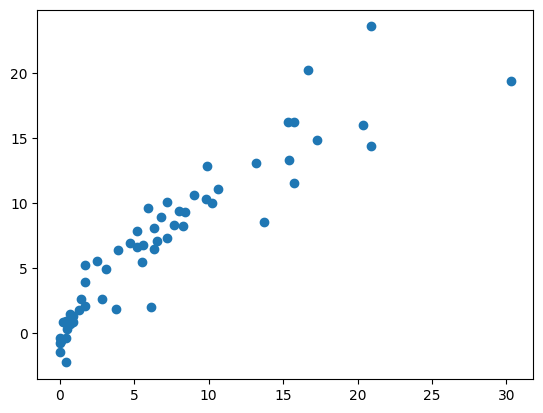

In [177]:
plt.scatter(y_test,y_pred_elastic_cv)
mae=mean_absolute_error(y_test,y_pred_elastic_cv)
score=r2_score(y_test,y_pred_elastic_cv)
print("Mean absolute error", mae)
print("R2 Score", score)